# Ensemble Methods

## Wine 품질 데이터를 이용하여 분석

In [3]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
wine = pd.read_csv('/content/drive/My Drive/data/winequality-red.csv')
pd.set_option('display.max_columns',None)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


분류의 목적으로 quality > 6.5인 경우에는 "good"이라 하고, 반대의 경우에는 "bad"라고 변환

In [6]:
wine['quality'] = wine['quality'].astype('float')

def change(wine):
    if wine['quality'] > 6.5:
        return 'good'
    else:
        return 'bad'

wine['quality'] = wine.apply(change, axis=1)
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


In [7]:
wine['y'] = wine['quality']
wine.loc[wine['y'] == 'good', 'y'] = 1
wine.loc[wine['y'] == 'bad', 'y'] = 0
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,y
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad,0


In [8]:
wine['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [9]:
wine['y'] = wine['y'].astype('int')

train, test data split

In [10]:
wine.drop(['quality'], axis = 1, inplace = True)

In [21]:
from sklearn.model_selection import train_test_split
X = wine.iloc[:,0:11]
y = wine['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=363, stratify=y)

print(len(X_train),len(X_test),len(y_train),len(y_test))

1119 480 1119 480


## Bagging

- max_depth: 트리의 깊이(default= None)<br/>
- min_samples_split: 노드를 쪼갤 때 최소 몇 개의 데이터가 존재해야 하는지(default=2)<br/>
- min_samples_leaf: 노드에 최소 몇 개의 데이터가 존재해야 하는지(default=1)<br/>
- n_estimators: 트리의 개수(deafult=10)<br/>
- max_feautres: 트리를 쪼갤 때, 임의 선택할 변수의 개수(default='auto') => _random feature selection_ 

In [22]:
from sklearn.ensemble import BaggingClassifier
bag_wine = BaggingClassifier(n_estimators=100, random_state=0)
bag_wine.fit(X_train, y_train)  # train data로 fit 시킴
y_pred1 = bag_wine.predict(X_test)  # test data를 넣어 prediction함

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[395,  20],
       [ 29,  36]])

In [24]:
np.trace(confusion_matrix(y_test, y_pred1))/len(y_test)

0.8979166666666667

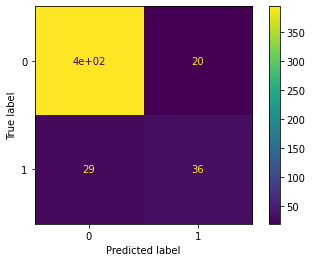

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots()
plot_confusion_matrix(bag_wine, X_test, y_test, ax=ax)
plt.show()

In [26]:
prob_pred1 = bag_wine.predict_proba(X_test)
pd.DataFrame(prob_pred1).head()
# 0일 확률 , 1일 확률

,0,1
0,0.99,0.01
1,0.41,0.59
2,0.97,0.03
3,0.79,0.21
4,1.00,0.00


## Boosting

In [27]:
from sklearn.ensemble import AdaBoostClassifier
boo_wine = AdaBoostClassifier(n_estimators=100, random_state=0)  # Adaboost
boo_wine.fit(X_train, y_train)
y_pred2 = boo_wine.predict(X_test)

In [28]:
confusion_matrix(y_test, y_pred2)

array([[391,  24],
       [ 40,  25]])

In [29]:
np.trace(confusion_matrix(y_test, y_pred2))/len(y_test)

0.8666666666666667

## Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gb_wine = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb_wine.fit(X_train, y_train)
y_pred4 = gb_wine.predict(X_test)

In [31]:
confusion_matrix(y_test, y_pred4)

array([[401,  14],
       [ 36,  29]])

In [32]:
np.trace(confusion_matrix(y_test, y_pred4))/len(y_test)

0.8958333333333334

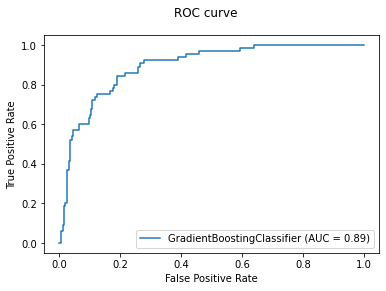

In [33]:
from sklearn.metrics import plot_roc_curve
roc_tree = plot_roc_curve(gb_wine, X_test, y_test)
roc_tree.figure_.suptitle("ROC curve")
plt.show()

Gradient Boosting 추가 설명

In [1]:
# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [3]:
# 필요한 모듈 임포트 후 decision tree로 fit 함
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [4]:
y2 = y - tree_reg1.predict(X)  # 오차
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)  # 오차를 다시 fit 함

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [7]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [8]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

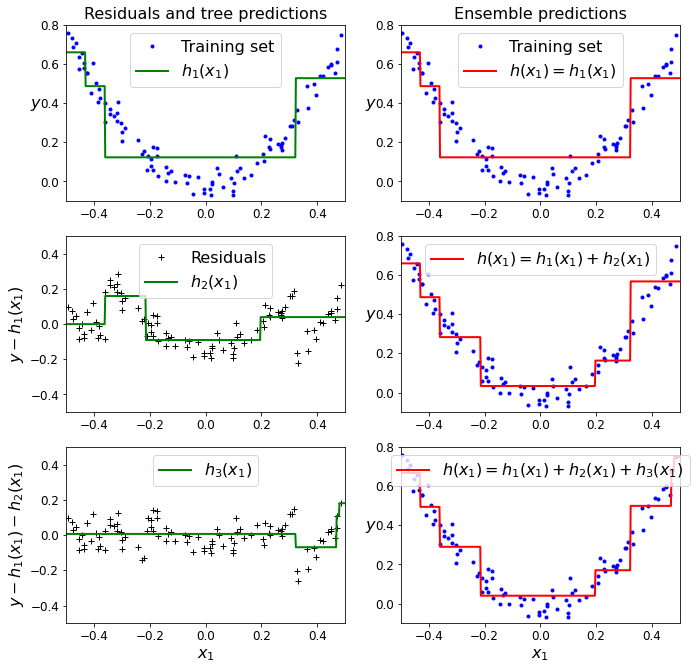

In [10]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_wine = RandomForestClassifier(n_estimators=100, random_state=300)
rf_wine.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=300,
                       verbose=0, warm_start=False)

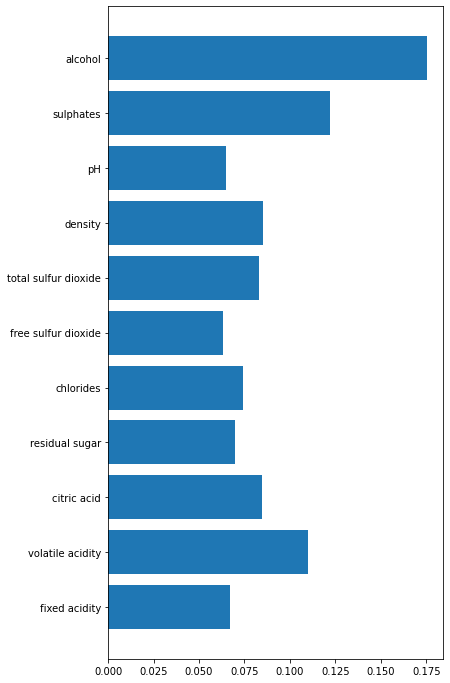

In [35]:
# 변수 중요도 계산

fig, ax = plt.subplots(figsize=(6, 12))
ax.barh(X.columns, rf_wine.feature_importances_)
plt.show()

In [36]:
y_pred3 = rf_wine.predict(X_test)
confusion_matrix(y_test, y_pred3)

array([[401,  14],
       [ 34,  31]])

In [37]:
np.trace(confusion_matrix(y_test, y_pred3))/len(y_test)

0.9

## Model Comparison

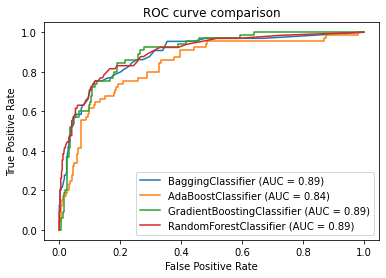

In [38]:
from sklearn.metrics import plot_roc_curve
bag_roc=plot_roc_curve(bag_wine, X_test, y_test)
plot_roc_curve(boo_wine, X_test, y_test, ax = bag_roc.ax_)
plot_roc_curve(gb_wine, X_test, y_test, ax = bag_roc.ax_)
plot_roc_curve(rf_wine, X_test, y_test, ax = bag_roc.ax_)
plt.title("ROC curve comparison")
plt.show()

# Random Forest Regression

## Several Models

In [39]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [40]:
insurance = pd.read_csv('/content/drive/My Drive/data/insurance.csv')
insurance.drop('region',axis=1, inplace=True)
df = pd.get_dummies(insurance, columns=['sex', 'smoker'], drop_first=True)
df['risk'] = [1 if df.iloc[i, 1] >= 30 else 0 for i in range(len(df))]
df

,age,bmi,children,charges,sex_male,smoker_yes,risk
0,19,27.900,0,16884.92400,0,1,0
1,18,33.770,1,1725.55230,1,0,1
2,28,33.000,3,4449.46200,1,0,1
3,33,22.705,0,21984.47061,1,0,0
4,32,28.880,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,1
1335,18,36.850,0,1629.83350,0,0,1
1336,21,25.800,0,2007.94500,0,0,0


In [41]:
train, test = train_test_split(df, test_size=0.3, random_state=0)
print('Train Set:', len(train), '| Test Set:', len(test))

Train Set: 936 | Test Set: 402


In [42]:
model1 = smf.ols(formula='charges ~ age + sex_male + bmi + children + smoker_yes',
                 data=train)
result1 = model1.fit()

In [43]:
model2 = smf.ols(formula=
            'charges ~ age+sex_male+bmi+children+smoker_yes+risk:smoker_yes+bmi:smoker_yes', 
                 data=train)
result2 = model2.fit()

In [44]:
from sklearn.ensemble import RandomForestRegressor
X_train = train.drop(['charges'], axis=1)
y_train = train['charges']
model3 = RandomForestRegressor(n_estimators=100, random_state=0)
model3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## Predicted Values

In [45]:
X_test = test.drop(['charges'], axis=1)
y_test = test['charges']
pred1 = result1.predict(X_test)
pred3 = model3.predict(X_test)

In [46]:
X_test['risk:smoker_yes'] = X_test['risk']*X_test['smoker_yes']
X_test['bmi:smoker_yes'] = X_test['bmi']*X_test['smoker_yes']
pred2 = result2.predict(X_test)

## Predictive $R^2$

In [47]:
from sklearn.metrics import r2_score as r2
print(np.round(r2(y_test, pred1),2))
print(np.round(r2(y_test, pred2),2))
print(np.round(r2(y_test, pred3),2))

0.79
0.89
0.85


## MAE

In [48]:
from sklearn.metrics import mean_absolute_error as mae
print(np.round(mae(y_test, pred1),2))
print(np.round(mae(y_test, pred2),2))
print(np.round(mae(y_test, pred3),2))

4008.35
2268.04
2761.29


## Variable Importance of Random Forest

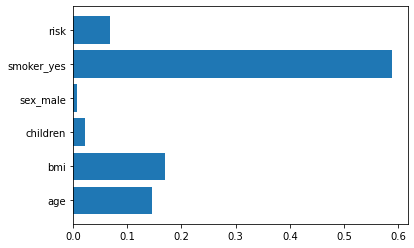

In [49]:
fig, ax = plt.subplots()
ax.barh(X_train.columns, model3.feature_importances_)
plt.show()

코드 참고

DSL 3기 민동재, 김지우님 boosting 세션 코드

응용통계학과 김현중교수님 Data mining 세션 코드